## Pandas ile tablo görüntüsü, missing data analizi, histogram oluşturma

## 1. Pandas ile Tablo Görüntüleme

Bu bölümde, pandas kütüphanesi kullanılarak veri tablosu oluşturulmuş ve temel fonksiyonlarla görüntülenmiştir.  
Veri örneği olarak öğrenci notlarını içeren basit bir tablo kullanılmıştır.

In [5]:
import pandas as pd


In [7]:

veri = {
    "İsim": ["Ahmet", "Zeynep", "Mehmet", "Elif", "Ali"],
    "Yaş": [22, 23, 21, 22, 24],
    "Not": [85, 90, 75, 95, 88]
}

df = pd.DataFrame(veri)


veri isimli bir sözlük (dictionary) tanımlanır.

Her sütun (İsim, Yaş, Not) bir liste içerir.

Bu yapı, bir tablonun satır ve sütunlarını temsil eder.

Yukarıdaki sözlükten bir pandas DataFrame (veri tablosu) oluşturulur.

Artık bu tablo üzerinden çeşitli işlemler yapılabilir.

In [8]:
print(" İlk 5 Satır:")
print(df.head())

 İlk 5 Satır:
     İsim  Yaş  Not
0   Ahmet   22   85
1  Zeynep   23   90
2  Mehmet   21   75
3    Elif   22   95
4     Ali   24   88


.head() fonksiyonu tablonun ilk 5 satırını getirir.

Veri büyük olduğunda genel bir önizleme sağlar.



In [9]:
print("\n Tablo Bilgisi:")
print(df.info())


 Tablo Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   İsim    5 non-null      object
 1   Yaş     5 non-null      int64 
 2   Not     5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes
None


.info():

Kaç sütun olduğunu

Hangi sütunda kaç veri olduğunu

Veri türlerini (int, object vs.) gösterir

In [10]:
print("\n İstatistiksel Özellikler:")
print(df.describe())


 İstatistiksel Özellikler:
             Yaş        Not
count   5.000000   5.000000
mean   22.400000  86.600000
std     1.140175   7.436397
min    21.000000  75.000000
25%    22.000000  85.000000
50%    22.000000  88.000000
75%    23.000000  90.000000
max    24.000000  95.000000


.describe():

Sayısal sütunlar için temel istatistikleri verir:

count (kaç değer var)

mean (ortalama)

std (standart sapma)

min, max, %25–50–75 çeyrekler

## 2-Missing Data Analizi (Kayıp Veri)

Veri setinizdeki bir gözlemde değişken için hiçbir veri değeri olmamasına denir.

Kayıp verinin kaynağı çok farklı olabilir;

Gerçekten kaybolmuş olabilir. Veri girilirken unutulmuş, gözden kaçmış olabilir.
Bu gözlem için böyle bir değer olmayabilir.
Değer gerçekten bilinmiyor veya tanımlanmıyor olabilir.

In [11]:
import pandas as pd
import numpy as np

veri = {
    "İsim": ["Deniz", "Mert", "Seda", "Ali", "Derya"],
    "Yaş": [28, np.nan, 35, 30, np.nan],
    "Ülke": ["Türkiye", "Almanya", "İngiltere", np.nan, "Fransa"],
    "Kalınan Gün": [7, 10, np.nan, 5, 8],
    "Otel Puanı": [4.5, 5.0, 4.0, np.nan, np.nan]
}

df = pd.DataFrame(veri)
df


,İsim,Yaş,Ülke,Kalınan Gün,Otel Puanı
0,Deniz,28.0,Türkiye,7.0,4.5
1,Mert,NaN,Almanya,10.0,5.0
2,Seda,35.0,İngiltere,NaN,4.0
3,Ali,30.0,NaN,5.0,NaN
4,Derya,NaN,Fransa,8.0,NaN


In [12]:
print("NaN (eksik) değerlerin bulunduğu hücreler:")
print(df.isnull())

print("\nSütun bazında eksik değer sayısı:")
print(df.isnull().sum())


NaN (eksik) değerlerin bulunduğu hücreler:
    İsim    Yaş   Ülke  Kalınan Gün  Otel Puanı
0  False  False  False        False       False
1  False   True  False        False       False
2  False  False  False         True       False
3  False  False   True        False        True
4  False   True  False        False        True

Sütun bazında eksik değer sayısı:
İsim           0
Yaş            2
Ülke           1
Kalınan Gün    1
Otel Puanı     2
dtype: int64


Bu dört satırda eksik veriler (NaN) belirli kurallara göre dolduruluyor



In [14]:
df["Yaş"] = df["Yaş"].fillna(df["Yaş"].mean())
df["Kalınan Gün"] = df["Kalınan Gün"].fillna(df["Kalınan Gün"].mean())
df["Otel Puanı"] = df["Otel Puanı"].fillna(df["Otel Puanı"].mean())
df["Ülke"] = df["Ülke"].fillna("Bilinmiyor")
print("Temizlenmiş veri:")
print(df)



Temizlenmiş veri:
    İsim   Yaş        Ülke  Kalınan Gün  Otel Puanı
0  Deniz  28.0     Türkiye          7.0         4.5
1   Mert  31.0     Almanya         10.0         5.0
2   Seda  35.0   İngiltere          7.5         4.0
3    Ali  30.0  Bilinmiyor          5.0         4.5
4  Derya  31.0      Fransa          8.0         4.5


## 3-Histogram Oluşturma

Histogram, sayısal verilerin dağılımını görselleştirir (örneğin: kaç kişi kaç yaşında, kaç gün kalmış vs.).

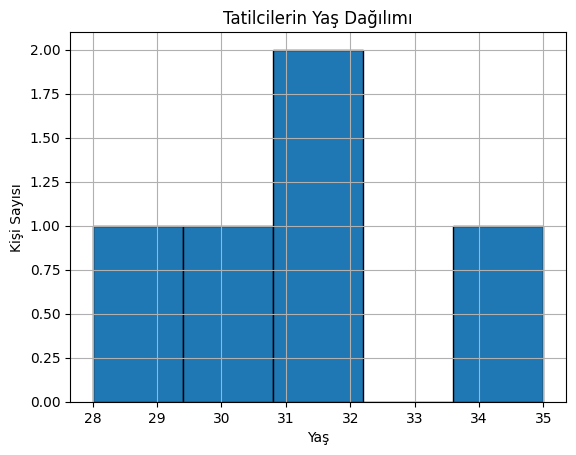

In [15]:
import matplotlib.pyplot as plt

# Yaşların dağılımı
plt.hist(df["Yaş"], bins=5, edgecolor='black')
plt.title("Tatilcilerin Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Kişi Sayısı")
plt.grid(True)
plt.show()
